<a href="https://colab.research.google.com/github/Leonardo-Mello22/Projeto-Teoria/blob/main/Graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

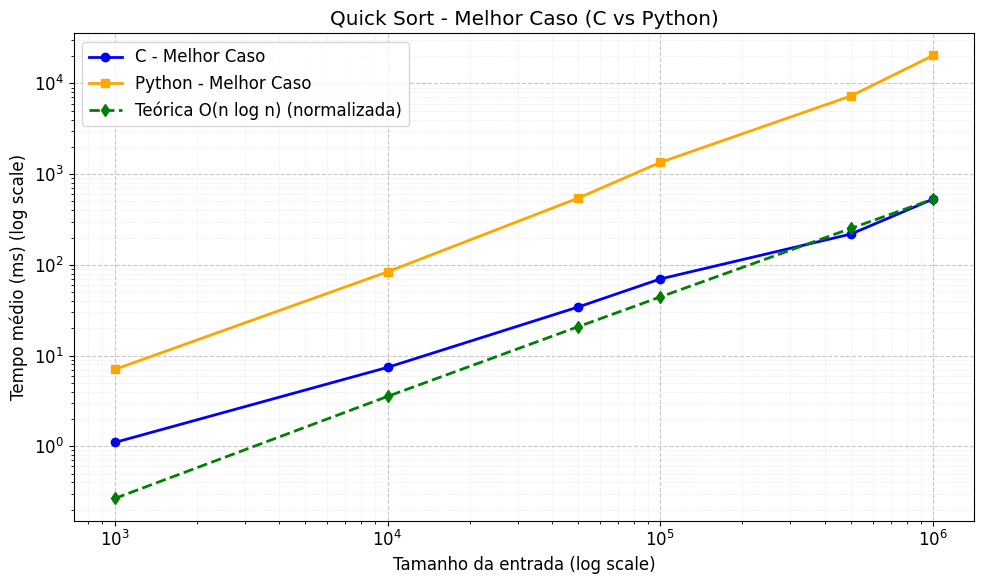

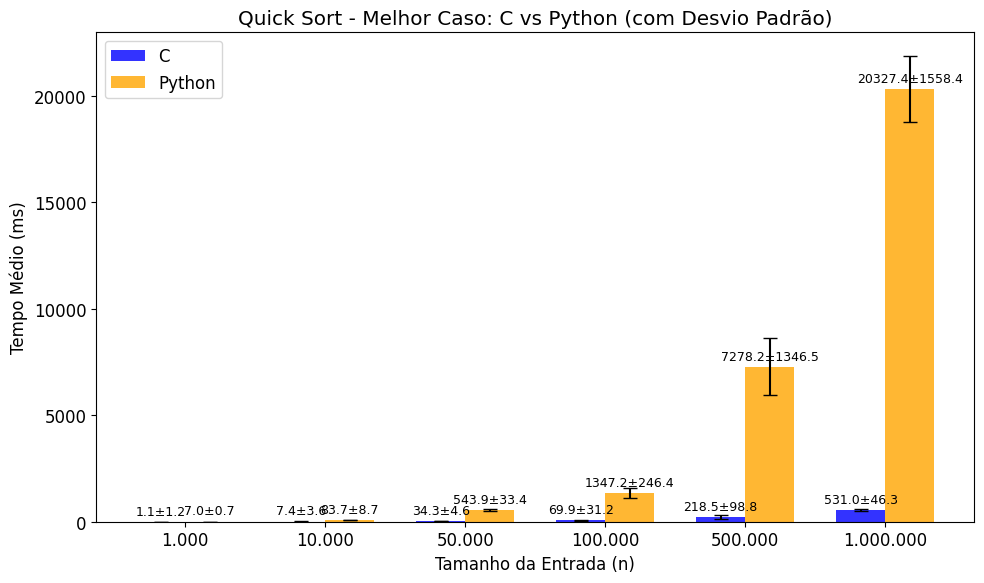

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Novos dados (sem tamanho 100)
tamanhos = np.array([1000, 10000, 50000, 100000, 500000, 1000000])
tempo_c = np.array([1.1000, 7.4000, 34.2667, 69.8667, 218.5000, 531.0333])
tempo_py = np.array([7.0243, 83.7290, 543.8595, 1347.2127, 7278.2320, 20327.3652])

# Desvios padrão
desvio_c = [1.1847, 3.6065, 4.5708, 31.1987, 98.7839, 46.2918]
desvio_py = [0.6898, 8.6777, 33.4433, 246.4106, 1346.5073, 1558.3571]

# Curva teórica O(n log n) (normalizada)
complexidade_onlogn = tamanhos * np.log2(tamanhos)
complexidade_onlogn = complexidade_onlogn / complexidade_onlogn[-1] * tempo_c[-1]

# Rótulos de tamanhos para gráfico de barras
tamanhos_col = ['1.000', '10.000', '50.000', '100.000', '500.000', '1.000.000']
tempo_c_col = tempo_c
tempo_py_col = tempo_py

# Função auxiliar para log
def formatar_eixo_log(ax):
    from matplotlib.ticker import LogLocator
    ax.xaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
    ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
    ax.xaxis.set_minor_formatter(plt.NullFormatter())
    ax.yaxis.set_minor_formatter(plt.NullFormatter())
    ax.grid(which='major', linestyle='--', linewidth=0.8, alpha=0.7)
    ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.4)

plt.rcParams.update({'font.size': 12})

# Gráfico 1 - Melhor Caso (linhas log-log)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(tamanhos, tempo_c, 'o-', color='blue', label="C - Melhor Caso", linewidth=2, markersize=6)
ax.plot(tamanhos, tempo_py, 's-', color='orange', label="Python - Melhor Caso", linewidth=2, markersize=6)
ax.plot(tamanhos, complexidade_onlogn, 'd--', color='green', label="Teórica O(n log n) (normalizada)", linewidth=2, markersize=6)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Tamanho da entrada (log scale)")
ax.set_ylabel("Tempo médio (ms) (log scale)")
ax.set_title("Quick Sort - Melhor Caso (C vs Python)")
ax.legend()
formatar_eixo_log(ax)
plt.tight_layout()
plt.show()

# Gráfico 2 - Barras com desvio padrão (melhor caso)
x = np.arange(len(tamanhos_col))
largura = 0.35

fig, ax = plt.subplots(figsize=(10,6))
barras_c = ax.bar(x - largura/2, tempo_c_col, largura, yerr=desvio_c, capsize=5,
                  label='C', color='blue', alpha=0.8)
barras_py = ax.bar(x + largura/2, tempo_py_col, largura, yerr=desvio_py, capsize=5,
                   label='Python', color='orange', alpha=0.8)

ax.set_xlabel('Tamanho da Entrada (n)')
ax.set_ylabel('Tempo Médio (ms)')
ax.set_title('Quick Sort - Melhor Caso: C vs Python (com Desvio Padrão)')
ax.set_xticks(x)
ax.set_xticklabels(tamanhos_col)
ax.legend()

# Adiciona valores acima das barras com desvio
def adicionar_valores(barras, desvios):
    for barra, desvio in zip(barras, desvios):
        altura = barra.get_height()
        ax.annotate(f'{altura:.1f}±{desvio:.1f}',
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0,3), textcoords='offset points',
                    ha='center', va='bottom', fontsize=9)

adicionar_valores(barras_c, desvio_c)
adicionar_valores(barras_py, desvio_py)

plt.tight_layout()
plt.show()
